In [1]:
%matplotlib inline
import pickle
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import seaborn as sns
from sklearn.model_selection import KFold
from IPython.display import HTML, display
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [3]:
# data = pd.read_csv('./KB_mxxg/comb_pre_to_cat2.csv')
data = pd.read_csv('./MERGE/fin_data.csv')
data = data.drop(['Unnamed: 0'], 1)

In [4]:
data.columns.values

array(['deal_price', 'deal_year', 'deal_month', 'dong', 'current_floor',
       'total_unit', 'total_building', 'max_floor', 'min_floor',
       'total_parking', 'unit_parking', 'conv_lists', 'medi_lists',
       'park_lists', 'road_lists', 'kindergarten', 'elementary_school',
       'middle_school', 'high_school', 'university', 'etc_lists',
       'S-Line1', 'S-Line2', 'S-Line3', 'S-Line4', 'S-Line5', 'S-Line6',
       'S-Line7', 'S-Line8', 'S-Line9', 'S-LineBD', 'S-LineNBD',
       'S-LineGC', 'S-LineJA', 'S-LineAir', 'distance',
       'exclusive_use_area', 'latitude', 'longitude', 'address_by_law',
       'room_count', 'bathroom_count', 'cont_rank', 'com_year', 'com_mon',
       'avg_price', 'sub_num', 'bldg_age', 'lv_fg', 'ht_cnr', 'ht_dst',
       'ht_indv', 'fuel_un', 'fuel_cog', 'fuel_gas', 'stair_un',
       'corridor', 'mixed', 'stairway'], dtype=object)

In [5]:
data.head()

,deal_price,deal_year,deal_month,dong,current_floor,total_unit,total_building,max_floor,min_floor,total_parking,unit_parking,conv_lists,medi_lists,park_lists,road_lists,kindergarten,elementary_school,middle_school,high_school,university,etc_lists,S-Line1,S-Line2,S-Line3,S-Line4,S-Line5,S-Line6,S-Line7,S-Line8,S-Line9,S-LineBD,S-LineNBD,S-LineGC,S-LineJA,S-LineAir,distance,exclusive_use_area,latitude,longitude,address_by_law,room_count,bathroom_count,cont_rank,com_year,com_mon,avg_price,sub_num,bldg_age,lv_fg,ht_cnr,ht_dst,ht_indv,fuel_un,fuel_cog,fuel_gas,stair_un,corridor,mixed,stairway
0,15000.0,2006,4,51,5,291,1,9,3,228,0,0,1,3,0,1,1,0,0,1,11,0,0,1,0,1,0,0,0,0,0,0,0,0,0,350,48.54,37.575113,126.990056,1111013300,1.0,1.0,2,2003,11,3090234,2,3,0.555556,0,0,1,0,0,1,0,1,0,0
1,14800.0,2006,5,51,3,291,1,9,3,228,0,0,1,3,0,1,1,0,0,1,11,0,0,1,0,1,0,0,0,0,0,0,0,0,0,350,46.64,37.575113,126.990056,1111013300,1.0,1.0,2,2003,11,3173241,2,3,0.333333,0,0,1,0,0,1,0,1,0,0
2,15000.0,2006,8,51,3,291,1,9,3,228,0,0,1,3,0,1,1,0,0,1,11,0,0,1,0,1,0,0,0,0,0,0,0,0,0,350,45.50,37.575113,126.990056,1111013300,1.0,1.0,2,2003,11,3296703,2,3,0.333333,0,0,1,0,0,1,0,1,0,0
3,16000.0,2006,9,51,2,291,1,9,3,228,0,0,1,3,0,1,1,0,0,1,11,0,0,1,0,1,0,0,0,0,0,0,0,0,0,350,46.64,37.575113,126.990056,1111013300,1.0,1.0,2,2003,11,3430531,2,3,0.222222,0,0,1,0,0,1,0,1,0,0
4,12000.0,2006,9,51,7,291,1,9,3,228,0,0,1,3,0,1,1,0,0,1,11,0,0,1,0,1,0,0,0,0,0,0,0,0,0,350,36.08,37.575113,126.990056,1111013300,1.0,1.0,2,2003,11,3325942,2,3,0.777778,0,0,1,0,0,1,0,1,0,0


### Add Rebuild Data

In [6]:
data['law_dong'] = data['address_by_law'].astype('str').str.slice(6,8)

In [7]:
data.law_dong = data.law_dong.astype(int)

In [8]:
data = data.drop('dong', 1)

In [9]:
data.columns.values

array(['deal_price', 'deal_year', 'deal_month', 'current_floor',
       'total_unit', 'total_building', 'max_floor', 'min_floor',
       'total_parking', 'unit_parking', 'conv_lists', 'medi_lists',
       'park_lists', 'road_lists', 'kindergarten', 'elementary_school',
       'middle_school', 'high_school', 'university', 'etc_lists',
       'S-Line1', 'S-Line2', 'S-Line3', 'S-Line4', 'S-Line5', 'S-Line6',
       'S-Line7', 'S-Line8', 'S-Line9', 'S-LineBD', 'S-LineNBD',
       'S-LineGC', 'S-LineJA', 'S-LineAir', 'distance',
       'exclusive_use_area', 'latitude', 'longitude', 'address_by_law',
       'room_count', 'bathroom_count', 'cont_rank', 'com_year', 'com_mon',
       'avg_price', 'sub_num', 'bldg_age', 'lv_fg', 'ht_cnr', 'ht_dst',
       'ht_indv', 'fuel_un', 'fuel_cog', 'fuel_gas', 'stair_un',
       'corridor', 'mixed', 'stairway', 'law_dong'], dtype=object)

In [10]:
data['rebuild'] = np.where(data['bldg_age'] >= 30 , 1, 0)

In [11]:
def gucode(path):
    gucode = {}
    df = pd.read_csv(path, sep=':',names=['name', 'code'])
    for i,code in enumerate(df['code']):
        gucode[code] = df['name'][i]
    return gucode

gucode = gucode('./KB_mxxg/gucode.txt')

In [12]:
gucode

{11110: '종로구',
 11140: '중구',
 11170: '용산구',
 11200: '성동구',
 11215: '광진구',
 11230: '동대문구',
 11260: '중랑구',
 11290: '성북구',
 11305: '강북구',
 11320: '도봉구',
 11350: '노원구',
 11380: '은평구',
 11410: '서대문구',
 11440: '마포구',
 11470: '양천구',
 11500: '강서구',
 11530: '구로구',
 11545: '금천구',
 11560: '영등포구',
 11590: '동작구',
 11620: '관악구',
 11650: '서초구',
 11680: '강남구',
 11710: '송파구',
 11740: '강동구'}

In [13]:
def idx_custom(custom_data, year_range, year_idx, code):
    custom_data = custom_data.iloc[year_idx]
    custom_data = custom_data.reset_index(drop=True)
    print('Only {} data in {} year(s)'.format(gucode[code], year_range))
    print('Data size : {}'.format(len(custom_data)))
    
    return custom_data, gucode[code]

In [14]:
def custom_data(code):
    #input gu-code & year
    min_year = int(input('start year: '))
    max_year = int(input('end year: '))
    
    gu_ddd = np.where(data['address_by_law'].astype(str).str.startswith(str(code)))
    print(gu_ddd)
    
#     gu_idx = np.where(data[str(code)]==1)[0]
    
    custom_data = data.iloc[gu_ddd] #원하는 구만 잘라냄
    custom_data = custom_data.reset_index(drop=True)
    
    year_range = []
    
    if max_year >= min_year:
        
        for year in range(min_year, max_year + 1):
            year_range.append(year)
            
        tmp = [np.where(custom_data['deal_year'] == year)[0] for year in year_range]
        year_idx = np.concatenate(tmp)

        return idx_custom(custom_data, year_range, year_idx, code)
        
    elif max_year == min_year:
        year_range.append(min_year)
        year_idx = np.where(custom_data['deal_year'] == year_range[0])[0]
        
        return idx_custom(custom_data,year_range, year_idx, code)
    else:
        return 0
    

In [15]:
dataset, gu_name = custom_data(11680)

start year: 2010
end year: 2018
(array([739913, 739914, 739915, ..., 907877, 907878, 907879]),)
Only 강남구 data in [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018] year(s)
Data size : 37951


### Drop nan

In [16]:
dataset = dataset.dropna()

## EDA  pt.2

In [17]:
EDA_DATA = dataset
EDA_DATA.columns.values

array(['deal_price', 'deal_year', 'deal_month', 'current_floor',
       'total_unit', 'total_building', 'max_floor', 'min_floor',
       'total_parking', 'unit_parking', 'conv_lists', 'medi_lists',
       'park_lists', 'road_lists', 'kindergarten', 'elementary_school',
       'middle_school', 'high_school', 'university', 'etc_lists',
       'S-Line1', 'S-Line2', 'S-Line3', 'S-Line4', 'S-Line5', 'S-Line6',
       'S-Line7', 'S-Line8', 'S-Line9', 'S-LineBD', 'S-LineNBD',
       'S-LineGC', 'S-LineJA', 'S-LineAir', 'distance',
       'exclusive_use_area', 'latitude', 'longitude', 'address_by_law',
       'room_count', 'bathroom_count', 'cont_rank', 'com_year', 'com_mon',
       'avg_price', 'sub_num', 'bldg_age', 'lv_fg', 'ht_cnr', 'ht_dst',
       'ht_indv', 'fuel_un', 'fuel_cog', 'fuel_gas', 'stair_un',
       'corridor', 'mixed', 'stairway', 'law_dong', 'rebuild'],
      dtype=object)

In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37771 entries, 0 to 37950
Data columns (total 60 columns):
deal_price            37771 non-null float64
deal_year             37771 non-null int64
deal_month            37771 non-null int64
current_floor         37771 non-null int64
total_unit            37771 non-null int64
total_building        37771 non-null int64
max_floor             37771 non-null int64
min_floor             37771 non-null int64
total_parking         37771 non-null int64
unit_parking          37771 non-null int64
conv_lists            37771 non-null int64
medi_lists            37771 non-null int64
park_lists            37771 non-null int64
road_lists            37771 non-null int64
kindergarten          37771 non-null int64
elementary_school     37771 non-null int64
middle_school         37771 non-null int64
high_school           37771 non-null int64
university            37771 non-null int64
etc_lists             37771 non-null int64
S-Line1               37771 n

In [ ]:
plt.figure(figsize=(35, 35))
sns.heatmap(data=EDA_DATA.corr(), annot=False, fmt='.2f', linewidths='1', cmap='RdBu_r')

In [19]:
def datasplit(data):
    data = data.sample(frac=1).reset_index(drop=True) #shuffle
    data = data.reset_index(drop=True) #index 초기화
    
    train_len = int(len(data)*0.8)
    
    train = data.loc[:train_len-1]
    train = train.sample(frac=1).reset_index(drop=True) #shuffle
    train = train.reset_index(drop=True) #index 초기화
    
    test = data.loc[train_len:]
    test = test.sample(frac=1).reset_index(drop=True) #shuffle
    test = test.reset_index(drop=True)
    
    print ('{} data is splitted into {} train / {} test data'.format(len(data),len(train), len(test)))
    return train, test

In [20]:
dataset = dataset.astype(float)

In [ ]:
# dataset.to_csv('tax_fin_data.csv')

In [38]:
dataset = dataset.drop('address_by_law', 1)

In [39]:
train, test = datasplit(dataset)

37771 data is splitted into 30216 train / 7555 test data


In [40]:
def make_x_y(data):
    x = data.drop(['deal_price', 'avg_price'],1)
    y = data['deal_price'].values
    
    print('Done')
    return x,y

In [41]:
x_train, y_train = make_x_y(train)
x_test, y_test = make_x_y(test)

Done
Done


In [42]:
x_train

,deal_year,deal_month,current_floor,total_unit,total_building,max_floor,min_floor,total_parking,unit_parking,conv_lists,medi_lists,park_lists,road_lists,kindergarten,elementary_school,middle_school,high_school,university,etc_lists,S-Line1,S-Line2,S-Line3,S-Line4,S-Line5,S-Line6,S-Line7,S-Line8,S-Line9,S-LineBD,S-LineNBD,S-LineGC,S-LineJA,S-LineAir,distance,exclusive_use_area,latitude,longitude,room_count,bathroom_count,cont_rank,com_year,com_mon,sub_num,bldg_age,lv_fg,ht_cnr,ht_dst,ht_indv,fuel_un,fuel_cog,fuel_gas,stair_un,corridor,mixed,stairway,law_dong,rebuild
0,2013.0,11.0,2.0,680.0,12.0,15.0,10.0,1020.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,697.0,84.9700,37.484896,127.090680,3.0,2.0,1.0,1997.0,11.0,2.0,16.0,0.133333,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,15.0,0.0
1,2011.0,2.0,12.0,1758.0,11.0,15.0,15.0,1758.0,1.0,2.0,0.0,5.0,2.0,2.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,629.0,49.8600,37.494686,127.075402,2.0,1.0,350.0,1992.0,10.0,2.0,19.0,0.800000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0
2,2016.0,5.0,5.0,960.0,14.0,25.0,7.0,1259.0,1.0,6.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,567.0,59.8800,37.496388,127.058401,3.0,1.0,1.0,2000.0,7.0,2.0,16.0,0.200000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,6.0,0.0
3,2011.0,1.0,9.0,1758.0,11.0,15.0,15.0,1758.0,1.0,2.0,0.0,5.0,2.0,2.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,629.0,33.1800,37.494686,127.075402,2.0,1.0,350.0,1992.0,10.0,2.0,19.0,0.600000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0
4,2011.0,1.0,4.0,4424.0,28.0,14.0,14.0,5000.0,1.0,4.0,2.0,2.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,396.0,76.7900,37.497418,127.065327,3.0,1.0,1000.0,1979.0,8.0,2.0,32.0,0.285714,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,6.0,1.0
5,2012.0,10.0,12.0,247.0,2.0,13.0,13.0,272.0,1.0,0.0,2.0,2.0,2.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,910.0,104.0100,37.490891,127.042100,3.0,1.0,1000.0,1983.0,6.0,1.0,29.0,0.923077,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,18.0,0.0
6,2013.0,9.0,8.0,1094.0,10.0,15.0,15.0,1077.0,0.0,0.0,1.0,2.0,2.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,952.0,124.6600,37.490449,127.039997,4.0,2.0,5.0,1995.0,12.0,2.0,18.0,0.533333,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,18.0,0.0
7,2018.0,1.0,14.0,1020.0,20.0,15.0,15.0,1554.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,714.0,101.9400,37.474124,127.094090,4.0,2.0,1.0,2014.0,6.0,1.0,4.0,0.933333,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,12.0,0.0
8,2013.0,3.0,3.0,728.0,8.0,14.0,14.0,633.0,0.0,1.0,3.0,2.0,1.0,1.0,1.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,213.0,157.3600,37.529934,127.028904,5.0,2.0,10.0,1978.0,10.0,1.0,35.0,0.214286,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,10.0,1.0
9,2012.0,11.0,20.0,713.0,11.0,22.0,13.0,1335.0,1.0,1.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,419.0,121.9310,37.515275,127.044743,4.0,2.0,8.0,2007.0,3.0,3.0,5.0,0.909091,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,5.0,0.0


/Users/tax_k/anaconda3/envs/DL/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


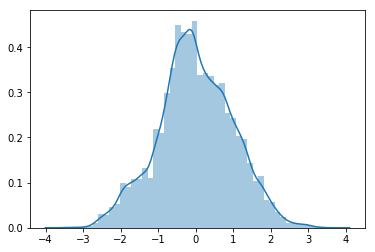

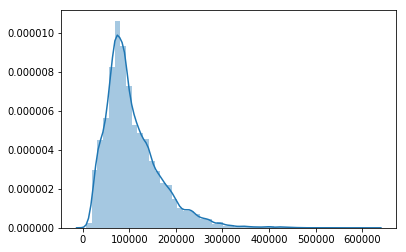

In [43]:
def johnson(y):
    gamma, eta, epsilon, lbda = stats.johnsonsu.fit(y)
    yt = gamma + eta*np.arcsinh((y-epsilon)/lbda)
    return yt, gamma, eta, epsilon, lbda

def johnson_inverse(y, gamma, eta, epsilon, lbda):
    return lbda*np.sinh((y-gamma)/eta) + epsilon

yt, g, et, ep, l = johnson(y_train) #정규분포화
yt2 = johnson_inverse(yt, g, et, ep, l) #inverse 정규분포화
plt.figure(1)
sns.distplot(yt)
plt.figure(2)
sns.distplot(yt2)

In [44]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras import regularizers,optimizers,losses
from keras.layers.normalization import BatchNormalization

import datetime
import os

In [45]:
CURR_PATH = ''

In [46]:
# path where all models are saved
now = datetime.datetime.now()
ymd = (str(now.year) + str(now.month).zfill(2) + str(now.day).zfill(2))

BASE_PATH = './'+gu_name+'_model_'+ymd+'/'
print(BASE_PATH)

MODEL_NAME = 'MLP_rmse'

if not os.path.exists(BASE_PATH):
    os.mkdir(BASE_PATH)

def create_checkpoint(model_name):
    MODEL_PATH = os.path.join(BASE_PATH, model_name)
    
    global CURR_PATH
    CURR_PATH = MODEL_PATH

    if not os.path.exists(MODEL_PATH):
        os.mkdir(MODEL_PATH)
    
        CURR_PATH = MODEL_PATH
    
    return ModelCheckpoint(filepath=os.path.join(MODEL_PATH, 'val_loss-{val_loss:.6f}.hdf5'),
                           monitor='val_loss',
                           verbose=1,
                           save_best_only=True)

early_stopping = EarlyStopping(monitor='val_loss',
                               patience=50)

./강남구_model_20181204/


In [47]:
def custom_loss(y_true,y_pred):
    import keras.backend as K
    #loss = K.mean((y_true - y_pred)**2, axis=-1)
    loss = K.mean(K.abs(y_pred - y_true), axis=-1)
    '''
    def _logcosh(x):
        return x + K.softplus(-2. * x) - K.log(2.)
    loss= K.mean(_logcosh(y_pred - y_true), axis=-1)
    '''
    return loss

In [48]:
def rmse(y_true,y_pred):
    import keras.backend as K
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [49]:
def rmsle(y_true, y_pred):
    import keras.backend as K
    first_log = K.log(y_pred + 1)
    second_log = K.log(y_true + 1)
    loss= K.sqrt(K.mean(K.square(first_log - second_log)))
    return loss

In [50]:
def rmsle_for_eval(y_true, y_pred):
    return np.sqrt(np.mean(np.square(np.log(y_pred+1)-np.log(y_true+1))))

In [51]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [52]:
adam = optimizers.Adam(lr=0.0009, decay=0.0001)

In [53]:
def Model(x_train, y_train, batch_size, max_epochs):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_dim=x_train.shape[1]))
    model.add(BatchNormalization(momentum = 0.9))
    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization(momentum = 0.9))
    model.add(Dense(32, activation='relu'))
    model.add(BatchNormalization(momentum = 0.9))
    model.add(Dense(16, activation='relu'))
    model.add(BatchNormalization(momentum = 0.9))
    model.add(Dense(8, activation='relu'))
    model.add(BatchNormalization(momentum = 0.9))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer=adam,
                  loss=rmse,
                  metrics=['accuracy'])

    model.summary()
    
    checkloss = create_checkpoint(MODEL_NAME)
    
    # Validation_split으로 validation 얼마나 해줄건지 정해중!
    history = model.fit(x_train, y_train,
                  batch_size=batch_size,
                  epochs=max_epochs,
                  validation_split = 0.1,
                  shuffle=True,
                  callbacks=[checkloss, early_stopping])
    
    return model, history

In [54]:
model = Model(x_train, yt, 32, 5000)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 128)               7424      
_________________________________________________________________
batch_normalization_6 (Batch (None, 128)               512       
_________________________________________________________________
dense_8 (Dense)              (None, 64)                8256      
_________________________________________________________________
batch_normalization_7 (Batch (None, 64)                256       
_________________________________________________________________
dense_9 (Dense)              (None, 32)                2080      
_________________________________________________________________
batch_normalization_8 (Batch (None, 32)                128       
_________________________________________________________________
dense_10 (Dense)             (None, 16)                528       
__________

27194/27194 [==============================] - 4s 138us/step - loss: 0.2515 - acc: 0.0000e+00 - val_loss: 0.1744 - val_acc: 0.0000e+00

Epoch 00030: val_loss did not improve from 0.16401
Epoch 31/5000
27194/27194 [==============================] - 4s 150us/step - loss: 0.2504 - acc: 0.0000e+00 - val_loss: 0.1828 - val_acc: 0.0000e+00

Epoch 00031: val_loss did not improve from 0.16401
Epoch 32/5000
27194/27194 [==============================] - 4s 158us/step - loss: 0.2511 - acc: 0.0000e+00 - val_loss: 0.1673 - val_acc: 0.0000e+00

Epoch 00032: val_loss did not improve from 0.16401
Epoch 33/5000
27194/27194 [==============================] - 4s 139us/step - loss: 0.2472 - acc: 0.0000e+00 - val_loss: 0.2065 - val_acc: 0.0000e+00

Epoch 00033: val_loss did not improve from 0.16401
Epoch 34/5000
27194/27194 [==============================] - 3s 125us/step - loss: 0.2492 - acc: 0.0000e+00 - val_loss: 0.1817 - val_acc: 0.0000e+00

Epoch 00034: val_loss did not improve from 0.16401
Epoch 35/


Epoch 00069: val_loss did not improve from 0.15803
Epoch 70/5000
27194/27194 [==============================] - 3s 117us/step - loss: 0.2412 - acc: 0.0000e+00 - val_loss: 0.1603 - val_acc: 0.0000e+00

Epoch 00070: val_loss did not improve from 0.15803
Epoch 71/5000
27194/27194 [==============================] - 3s 126us/step - loss: 0.2394 - acc: 0.0000e+00 - val_loss: 0.1796 - val_acc: 0.0000e+00

Epoch 00071: val_loss did not improve from 0.15803
Epoch 72/5000
27194/27194 [==============================] - 3s 123us/step - loss: 0.2345 - acc: 0.0000e+00 - val_loss: 0.1839 - val_acc: 0.0000e+00

Epoch 00072: val_loss did not improve from 0.15803
Epoch 73/5000
27194/27194 [==============================] - 3s 123us/step - loss: 0.2385 - acc: 0.0000e+00 - val_loss: 0.1725 - val_acc: 0.0000e+00

Epoch 00073: val_loss did not improve from 0.15803
Epoch 74/5000
27194/27194 [==============================] - 3s 125us/step - loss: 0.2354 - acc: 0.0000e+00 - val_loss: 0.1870 - val_acc: 0.0000


Epoch 00109: val_loss did not improve from 0.14681
Epoch 110/5000
27194/27194 [==============================] - 3s 126us/step - loss: 0.2330 - acc: 0.0000e+00 - val_loss: 0.1771 - val_acc: 0.0000e+00

Epoch 00110: val_loss did not improve from 0.14681
Epoch 111/5000
27194/27194 [==============================] - 3s 127us/step - loss: 0.2305 - acc: 0.0000e+00 - val_loss: 0.1717 - val_acc: 0.0000e+00

Epoch 00111: val_loss did not improve from 0.14681
Epoch 112/5000
27194/27194 [==============================] - 3s 123us/step - loss: 0.2336 - acc: 0.0000e+00 - val_loss: 0.1680 - val_acc: 0.0000e+00

Epoch 00112: val_loss did not improve from 0.14681
Epoch 113/5000
27194/27194 [==============================] - 4s 154us/step - loss: 0.2331 - acc: 0.0000e+00 - val_loss: 0.1543 - val_acc: 0.0000e+00

Epoch 00113: val_loss did not improve from 0.14681
Epoch 114/5000
27194/27194 [==============================] - 4s 157us/step - loss: 0.2305 - acc: 0.0000e+00 - val_loss: 0.1804 - val_acc: 0

In [55]:
def plot_train(history):
    fig, loss_ax = plt.subplots(figsize=(10,10))
    loss_ax.plot(history.history['loss'], 'y', label='train loss')
    loss_ax.plot(history.history['val_loss'], 'r', label='val loss')


    loss_ax.set_xlabel('epoch')
    loss_ax.set_ylabel('loss')

    loss_ax.legend(loc='upper right')

    plt.show()
    
def test_summary(model, weight_path):
    plot_train(model[1])
    model[0].load_weights(weight_path)
    norm_y = g + et*np.arcsinh((y_test-ep)/l)
    loss, acc = model[0].evaluate(x_test, norm_y, batch_size=32)
    #loss, acc = model[0].evaluate(x_test, y_test, batch_size=32)
    print('----- Evaluation loss and metrics -----')
    print('Test loss - RMSE : {:.5f}'.format(loss))
    
def save_model(model, path, gu_name):
    model_json = model[0].to_json()
    
    file_name = path+"/"+gu_name+'_model.json'
    print(file_name)
    with open(file_name, "w") as json_file : 
        json_file.write(model_json)
        
def load_model(path, gu_name):
    from keras.models import model_from_json
    
    file_name = path+"/"+gu_name+'_model.json'
    
    json_file = open(file_name, "r")
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
    
    return loaded_model

In [56]:
CURR_PATH

'./강남구_model_20181204/MLP_rmse'

In [57]:
def ignore_hidden_file(fname):
    return not fname.startswith(".")

def get_best_weights_path():
    file_list = os.listdir(CURR_PATH)
    not_hidden_files = list(filter(ignore_hidden_file, file_list))
    result = CURR_PATH + "/" + sorted(not_hidden_files)[0]
    print("Best weight path: ", result)
    
    return result

In [58]:
FULL_PATH = get_best_weights_path()

Best weight path:  ./강남구_model_20181204/MLP_rmse/val_loss-0.146815.hdf5


In [59]:
save_model(model, CURR_PATH, gu_name)

./강남구_model_20181204/MLP_rmse/강남구_model.json


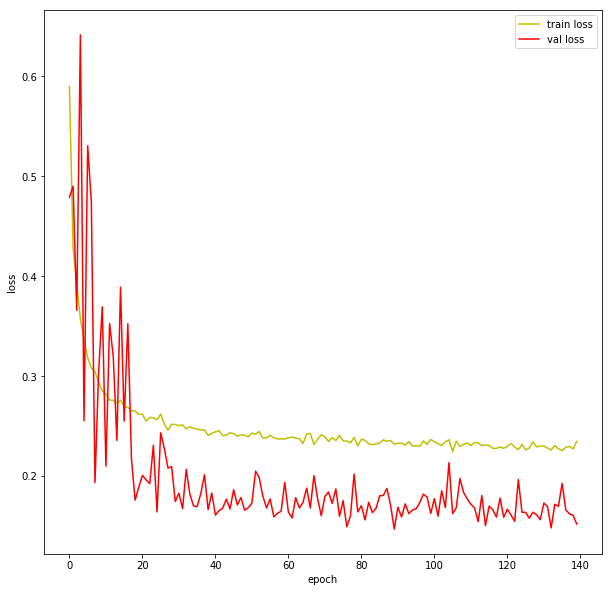

7555/7555 [==============================] - 0s 35us/step
----- Evaluation loss and metrics -----
Test loss - RMSE : 0.16267


In [60]:
test_summary(model,FULL_PATH)

In [61]:
def prediction_plot(n_sample):
    from sklearn.metrics import r2_score

    randidx = np.random.choice(len(x_test), n_sample, replace=False)
  
    
    y_pred = model[0].predict(x_test).flatten()
    y_pred = johnson_inverse(y_pred, g, et, ep, l)
    
    _y_pred = y_pred[randidx]
    y_sample = y_test[randidx]

    fig, (ax0, ax1) = plt.subplots(1,2, figsize=(20,10))

    index = np.arange(n_sample)
    bar_width = 0.35

    opacity = 0.4
    error_config = {'ecolor': '0.3'}

    rects1 = ax0.bar(index, y_sample, bar_width, alpha=opacity, color='b',label='GT')
    rects2 = ax0.bar(index + bar_width, _y_pred, bar_width, alpha=opacity, color='r',label='Pred')

    ax0.set_xlabel('Data')
    ax0.set_ylabel('Price')
    ax0.set_title('Difference between GT/Pred - {}'.format(gu_name))
    ax0.legend()

    
    loss = rmsle_for_eval(y_test, y_pred)

    lower_bound = int(y_test.min())-10000
    higher_bound = int(y_test.max())+10000
    
    
    mape = mean_absolute_percentage_error(y_test, y_pred)
    
    
    ax1.scatter(y_test, y_pred, alpha=opacity, color='g')
    ax1.plot([lower_bound, higher_bound], [lower_bound, higher_bound], '--k')
    ax1.set_ylabel('Pred')
    ax1.set_xlabel('GT')
    ax1.set_title('Regression - {}'.format(gu_name))
    ax1.text(lower_bound+25000, lower_bound+15000, r'$R^2$={:.2f}, RMSLE={:.5f}'.format(r2_score(y_test, y_pred),loss))
    ax1.set_xlim([lower_bound, higher_bound])
    ax1.set_ylim([lower_bound, higher_bound])
    
    fig.tight_layout()
    plt.show()
    
    # y_예측 - y_정답
    
    diff = y_pred - y_test
    abs_diff = abs(y_pred-y_test)
    dif_ratio = y_pred / y_test
    
    print('Max difference : {:.2f} 만원'.format(abs_diff.max()))
    print('Mean difference : {:.2f} 만원'.format(abs_diff.mean()))
    print('Min difference : {:.2f} 만'.format(abs_diff.min()))
    print('--------')
    print('Avg Price of {}: {:.2f} 만원'.format(gu_name,y_test.mean()))
    print('--------')
    print('R2 Coefficient : {:.3f}'.format(r2_score(y_test, y_pred)))
    print('RMLSE loss : {:.4f}'.format(loss))
    print('MAPE : {:.4f}' .format(mape))
    return y_pred, diff, abs_diff, dif_ratio

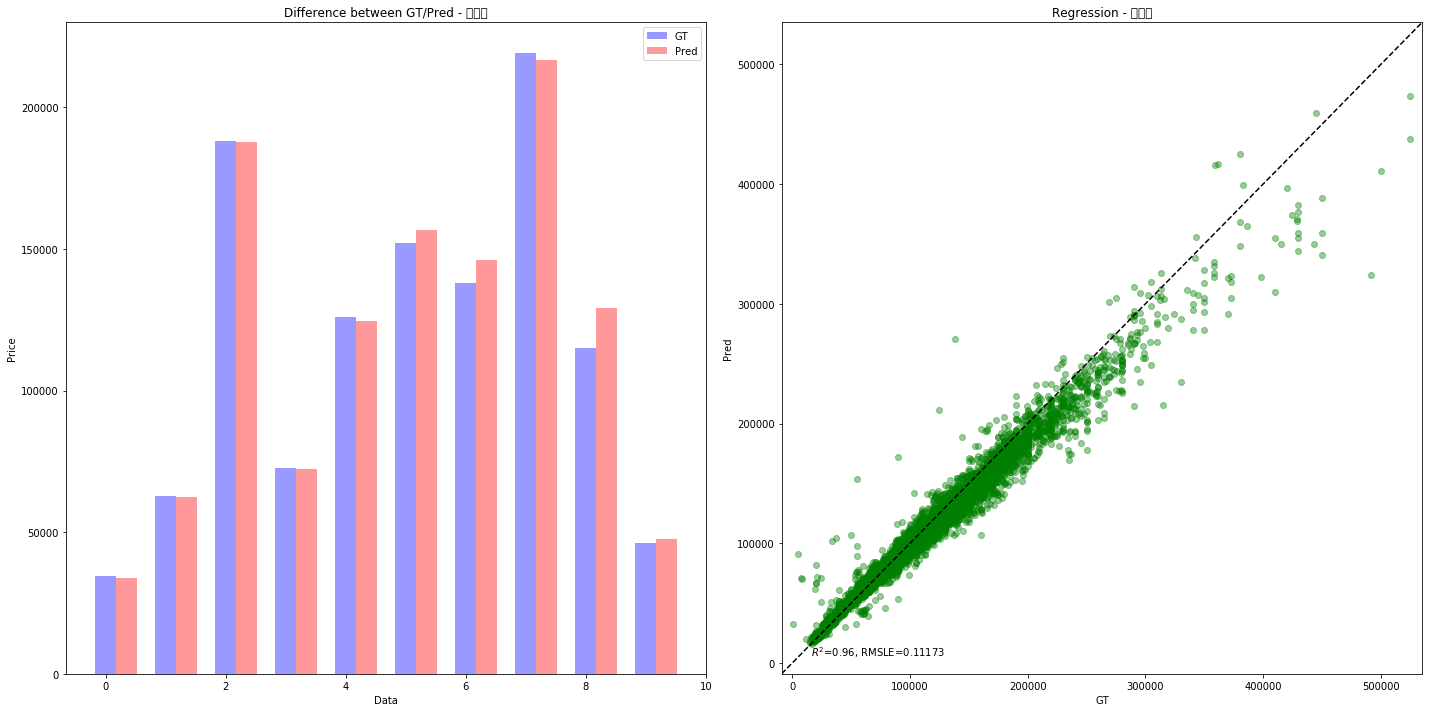

Max difference : 168293.50 만원
Mean difference : 6888.40 만원
Min difference : 1.00 만
--------
Avg Price of 강남구: 106382.27 만원
--------
R2 Coefficient : 0.962
RMLSE loss : 0.1117
MAPE : 7.1897


In [62]:
y_pred, diff, abs_diff, dif_ratio = prediction_plot(10)

In [63]:
def run_loaded_model(model, x_train, y_train, batch_size, max_epochs):
    model.compile(optimizer=adam,
                  loss=rmse,
                  metrics=['accuracy'])
    model.summary()
    
    checkloss = create_checkpoint(MODEL_NAME)
    
    history = model.fit(x_train, y_train,
                  batch_size=batch_size,
                  epochs=max_epochs,
                  validation_split = 0.1,
                  shuffle=True,
                  callbacks=[checkloss, early_stopping])
    
    return model, history

In [68]:
loaded_model = load_model(CURR_PATH, gu_name)
FULL_PATH = get_best_weights_path()
loaded_model.load_weights(FULL_PATH)

Best weight path:  ./강남구_model_20181204/MLP_rmse/val_loss-0.146815.hdf5


In [65]:
model = run_loaded_model(loaded_model, x_train, yt, 32, 1000)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 128)               7424      
_________________________________________________________________
batch_normalization_6 (Batch (None, 128)               512       
_________________________________________________________________
dense_8 (Dense)              (None, 64)                8256      
_________________________________________________________________
batch_normalization_7 (Batch (None, 64)                256       
_________________________________________________________________
dense_9 (Dense)              (None, 32)                2080      
_________________________________________________________________
batch_normalization_8 (Batch (None, 32)                128       
_________________________________________________________________
dense_10 (Dense)             (None, 16)                528       
__________

27194/27194 [==============================] - 3s 117us/step - loss: 0.2284 - acc: 0.0000e+00 - val_loss: 0.2054 - val_acc: 0.0000e+00

Epoch 00031: val_loss did not improve from 0.14695
Epoch 32/1000
27194/27194 [==============================] - 3s 116us/step - loss: 0.2328 - acc: 0.0000e+00 - val_loss: 0.1745 - val_acc: 0.0000e+00

Epoch 00032: val_loss did not improve from 0.14695
Epoch 33/1000
27194/27194 [==============================] - 3s 116us/step - loss: 0.2313 - acc: 0.0000e+00 - val_loss: 0.1710 - val_acc: 0.0000e+00

Epoch 00033: val_loss did not improve from 0.14695
Epoch 34/1000
27194/27194 [==============================] - 3s 116us/step - loss: 0.2318 - acc: 0.0000e+00 - val_loss: 0.1654 - val_acc: 0.0000e+00

Epoch 00034: val_loss did not improve from 0.14695
Epoch 35/1000
27194/27194 [==============================] - 3s 126us/step - loss: 0.2253 - acc: 0.0000e+00 - val_loss: 0.1814 - val_acc: 0.0000e+00

Epoch 00035: val_loss did not improve from 0.14695
Epoch 36/

27194/27194 [==============================] - 4s 131us/step - loss: 0.2202 - acc: 0.0000e+00 - val_loss: 0.1530 - val_acc: 0.0000e+00

Epoch 00072: val_loss did not improve from 0.14695


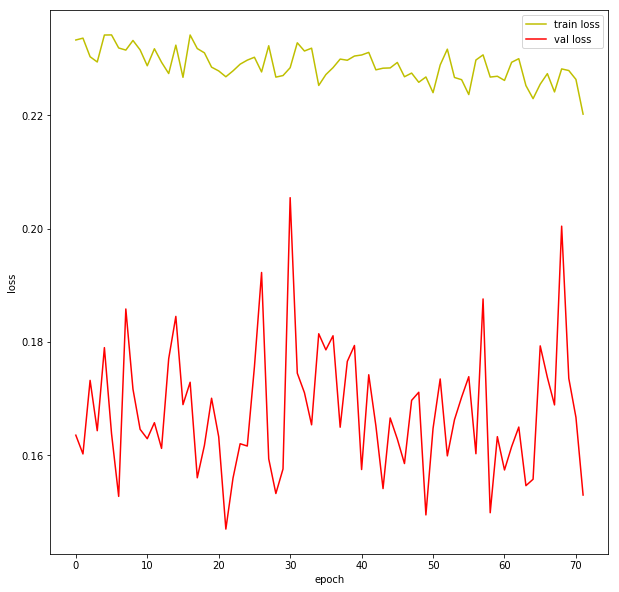

7555/7555 [==============================] - 0s 40us/step
----- Evaluation loss and metrics -----
Test loss - RMSE : 0.16267


In [66]:
test_summary(model,FULL_PATH)

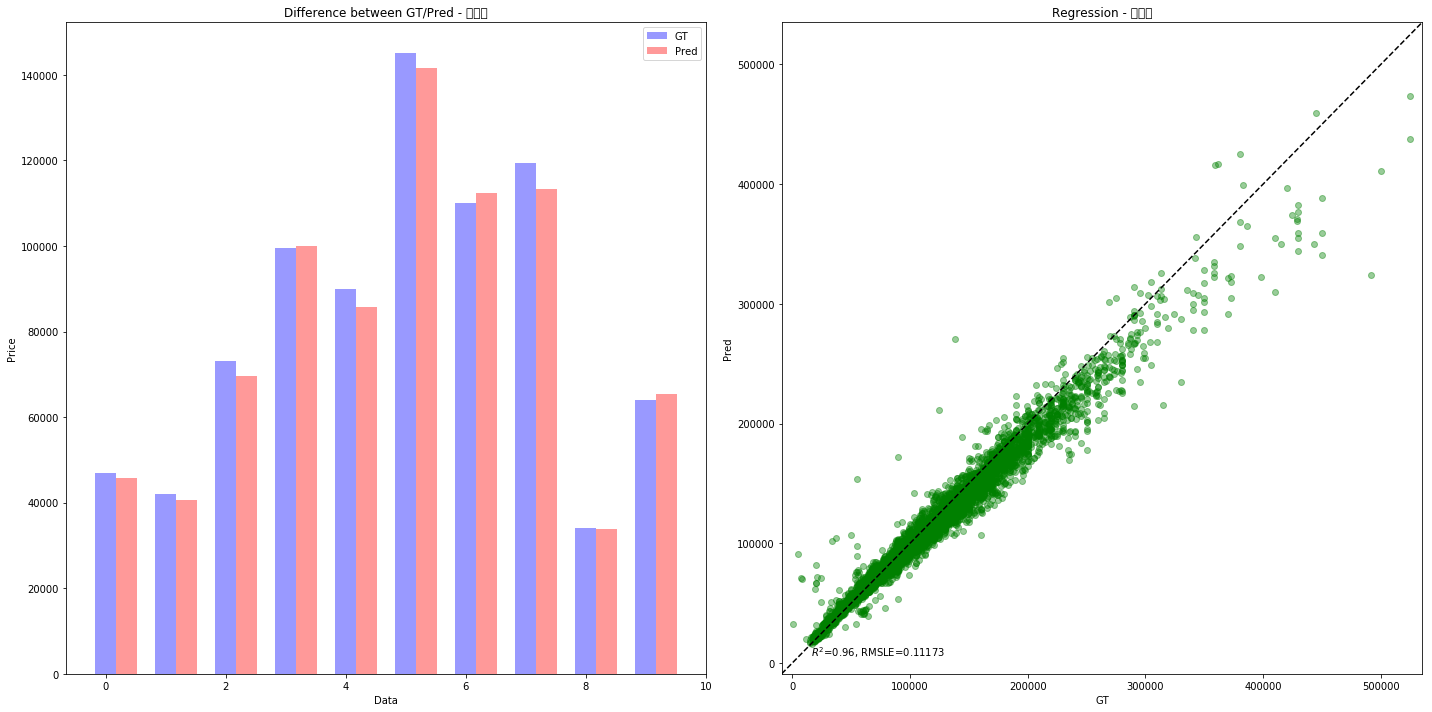

Max difference : 168293.50 만원
Mean difference : 6888.40 만원
Min difference : 1.00 만
--------
Avg Price of 강남구: 106382.27 만원
--------
R2 Coefficient : 0.962
RMLSE loss : 0.1117
MAPE : 7.1897


In [69]:
y_pred, diff, diff_abs, diff_ratio = prediction_plot(10)

###  특정 매물 input 들어올 때 !!! PREDICT

In [ ]:
diff_abs

In [ ]:
diff

In [ ]:
diff_ratio

In [72]:
tax_x = x_test.loc[4][:]
tax_y = y_test[4]
tax_x = pd.DataFrame(tax_x)

In [73]:
print("매물 X : ", tax_x)
print("매물 target : ", tax_y)

매물 X :                                4
deal_year           2018.000000
deal_month          7.000000   
current_floor       5.000000   
total_unit          1758.000000
total_building      11.000000  
max_floor           15.000000  
min_floor           15.000000  
total_parking       1758.000000
unit_parking        1.000000   
conv_lists          2.000000   
medi_lists          0.000000   
park_lists          5.000000   
road_lists          2.000000   
kindergarten        2.000000   
elementary_school   1.000000   
middle_school       1.000000   
high_school         1.000000   
university          0.000000   
etc_lists           1.000000   
S-Line1             0.000000   
S-Line2             0.000000   
S-Line3             1.000000   
S-Line4             0.000000   
S-Line5             0.000000   
S-Line6             0.000000   
S-Line7             0.000000   
S-Line8             0.000000   
S-Line9             0.000000   
S-LineBD            1.000000   
S-LineNBD           0.000000   


In [74]:
tax_x = tax_x.T

In [ ]:
tax_x = tax_x.values.reshape(1,57)

In [76]:
y_pred = model[0].predict(tax_x).flatten()
y_Fin = johnson_inverse(y_pred, g, et, ep, l)

In [77]:
y_pred

array([0.30958194], dtype=float32)

In [78]:
y_Fin

array([110707.09], dtype=float32)

In [83]:
Y_result = pd.DataFrame([tax_y, y_Fin[0]])

In [84]:
Y_result = Y_result.T

In [85]:
Y_result.columns = ['gt','pred']

In [86]:
Y_result

,gt,pred
0,108000.0,110707.09375


/Users/tax_k/anaconda3/envs/DL/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/tax_k/anaconda3/envs/DL/lib/python3.6/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/tax_k/anaconda3/envs/DL/lib/python3.6/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/tax_k/anaconda3/envs/DL/lib/python3.6/site-packages/statsmodels/nonparametric/bandwidths.py:20: RuntimeWarning: invalid value encountered in minimum
  return np.minimum(np.std(X, axis=0, ddof=1), IQR)
/Users/tax_k/anaconda3

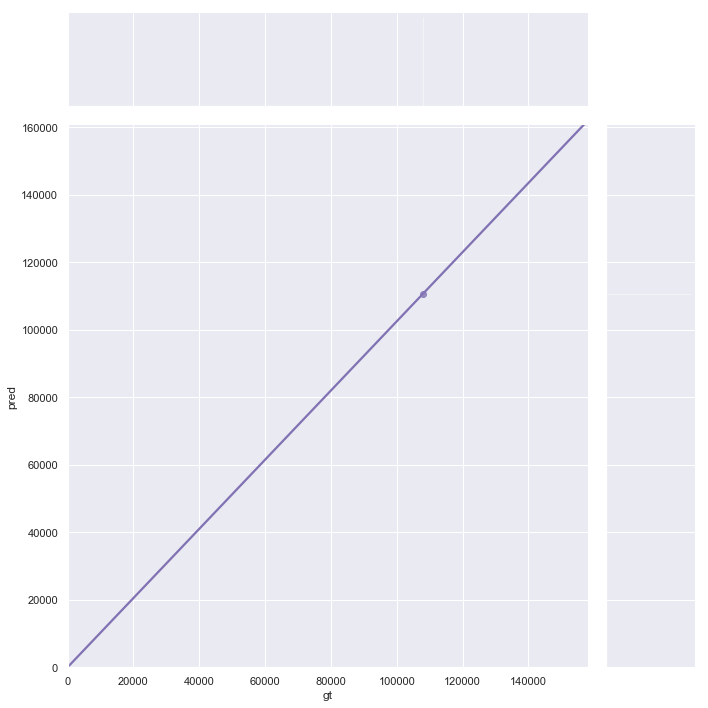

In [87]:
sns.set(style="darkgrid")

g = sns.jointplot("gt", "pred", data=Y_result, kind="reg",
                  xlim=(0, Y_result['gt'].max()+ 50000), ylim=(0, Y_result['pred'].max() + 50000), color="m", height=10)